<a href="https://colab.research.google.com/github/AbeerProg/RRDS/blob/main/SVMmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


file_path = 'b.xlsx'
df = pd.read_excel(file_path)



In [4]:
# Ensure all column names are stripped of leading/trailing whitespace
df.columns = df.columns.str.strip()

# Define the features and label
features = [ '1- punctuation_ratio', '2-FSpronoun_ratio', '3- word_count', '4- repeated_word_ratio', '5-vader_sentiment', '6- generality_score', '7-PassiveProportion', '8- likesCount', '9-reviewerNumberOfReviews', '01- isLocalGuide', 'TotalMedia']

X = df[features]
y = df['LABEL']



In [3]:
print(df.columns.tolist())


['text', '1- punctuation_ratio', '2-FSpronoun_ratio', '3- word_count', '4- repeated_word_ratio', '5-vader_sentiment', '6- generality_score', '7-PassiveProportion', '8- likesCount', '9-reviewerNumberOfReviews', '01- isLocalGuide', 'TotalMedia', 'LABEL']


In [5]:
# Convert to numeric and handle any non-numeric values
X = X.apply(pd.to_numeric, errors='coerce')
X.fillna(0, inplace=True)


In [6]:

# Standardize the numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 3: Train an SVM Classifier
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)



SVC(kernel='linear', probability=True, random_state=42)

In [7]:
# Step 4: Model Evaluation
y_pred = svm_model.predict(X_test)



In [8]:
# Print the classification report and accuracy
print("SVM Accuracy:", accuracy_score(y_test, y_pred))
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)



SVM Accuracy: 0.7758734344100198

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.83      0.80      2466
           1       0.78      0.71      0.74      2085

    accuracy                           0.78      4551
   macro avg       0.78      0.77      0.77      4551
weighted avg       0.78      0.78      0.77      4551



NameError: name 'clf' is not defined

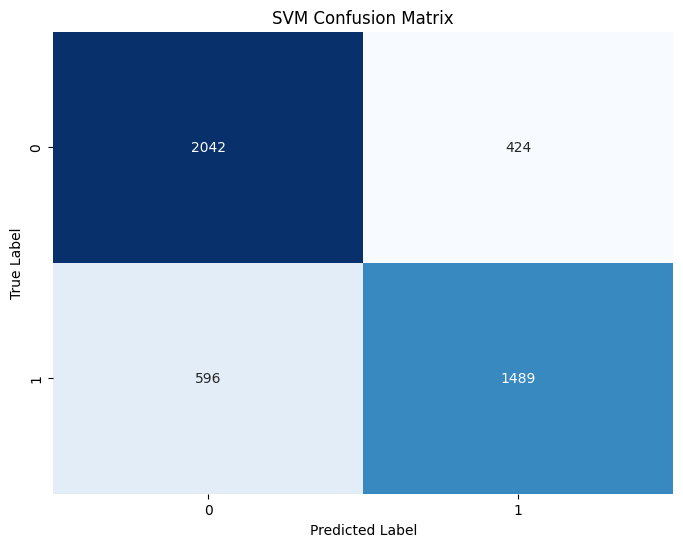

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('SVM Confusion Matrix')
plt.show()


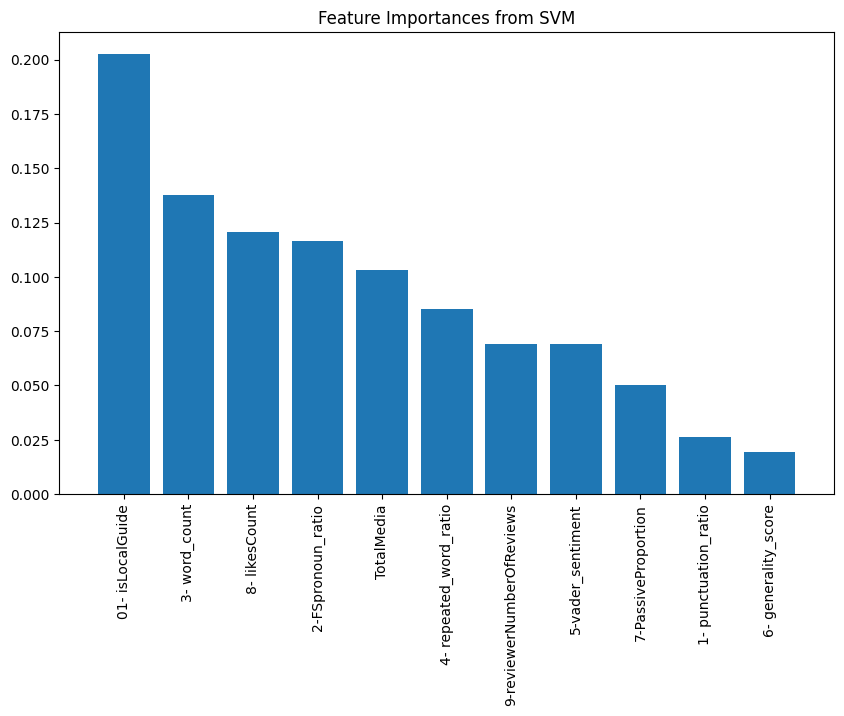

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure that the SVM model uses a linear kernel
if svm_model.kernel == 'linear':
    # Get the coefficients for each feature
    feature_importance = np.abs(svm_model.coef_[0])

    # Normalize the importance
    feature_importance = feature_importance / feature_importance.sum()

    # Create a bar plot for feature importance
    indices = np.argsort(feature_importance)[::-1]
    plt.figure(figsize=(10, 6))
    plt.title('Feature Importances from SVM')
    plt.bar(range(X.shape[1]), feature_importance[indices], align='center')
    plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
    plt.xlim([-1, X.shape[1]])
    plt.show()

else:
    print("Feature importance is not directly available for non-linear SVM kernels.")
